In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(centers=3,random_state=42)

In [4]:
import seaborn as sns

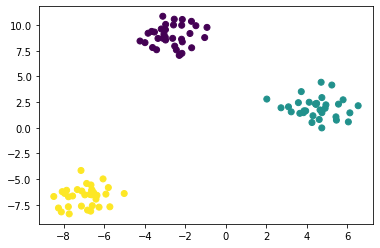

In [6]:
plt.scatter(X[:,0],X[:,1],c = y)

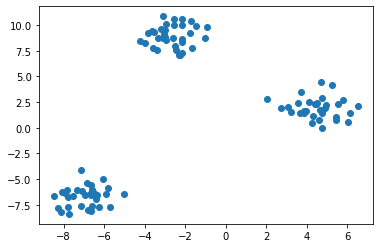

In [7]:
plt.scatter(X[:,0],X[:,1])

# Sklearn Implementation

In [8]:
from sklearn.cluster import KMeans

In [15]:
model = KMeans(n_clusters=5)

In [16]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
y_gen = model.labels_

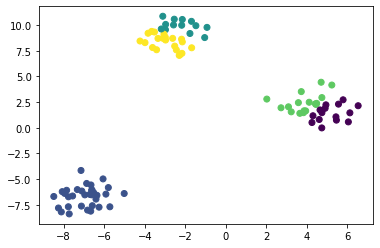

In [18]:
plt.scatter(X[:,0],X[:,1],c = y_gen)

In [19]:
model.cluster_centers_

array([[ 5.17096366,  1.40581899],
       [-6.95170962, -6.67621669],
       [-2.20127958,  9.94858935],
       [ 3.86755362,  2.44066237],
       [-2.95660471,  8.30877152]])

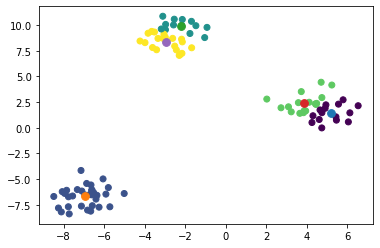

In [20]:
plt.scatter(X[:,0],X[:,1],c = y_gen)

for center in model.cluster_centers_:
  plt.scatter(center[0],center[1],s=60)

# Custom Implementation

In [22]:
import random

In [23]:
class Cluster:

  def __init__(self,center =3):
    self.center=center
    self.points = []

  def distance (self,point):
    return np.sqrt(np.sum(point - self.center)**2)

class CustomKMeans:

  def __init__(self,n_clusters =3):
    self.n_clusters=n_clusters

  def fit(self,X):
    clusters = []
    for i in range(self.n_clusters):
      cluster = Cluster(center = random.choice(X))
      clusters.append(cluster)

    labels =[]


    # going for each point
    for point in X:
      #collecting distances form every cluster
      distances = []
      for cluster in clusters: #voting
        distances.append(cluster.distance(point))

        #finding closest cluster
        closest_idx = np.argmin(distances)
        closest_cluster = clusters[closest_idx]
        closest_cluster.points.append(point)
        labels.append(closest_idx)

    self.labels_ = labels  
    self.cluster_centers_ = [cluster.center for cluster in clusters]

    



In [24]:
model = CustomKMeans(n_clusters=3)
model.fit(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


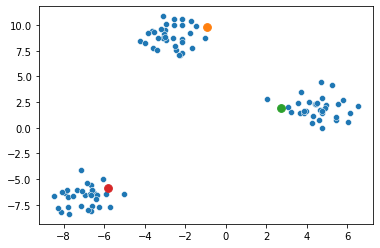

In [25]:
sns.scatterplot(X[:,0],X[:,1])

for center in model.cluster_centers_:
  plt.scatter(center[0],center[1],s=60)

In [27]:
model.cluster_centers_

[array([-0.92998481,  9.78172086]),
 array([2.72110762, 1.94665581]),
 array([-5.79657595, -5.82630754])]